<a href="https://colab.research.google.com/github/emrahyurtlu/deep-learning/blob/main/CMPE430/Lab_7_Multi_Class_Classification_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CMPE430 LAB WEEK 7 - Multi-Class Classification Loss Functions**

02.12.2021 Thursday 14:30-16:20

Lab Assistant : Cansen Çağlayan (cansen.caglayan@atilim.edu.tr)

**References**

Book : Deep Learning with Python, François Chollet

https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/



#**Loss Function**

To control the output of a neural network, you need to be able to measure how far this output is from what you expected. This is the job of the **loss function (objective function)** of the network.

The loss function takes the predictions of the network and the true target
(what you wanted the network to output) and computes a distance score, capturing
how well the network has done on this specific example.

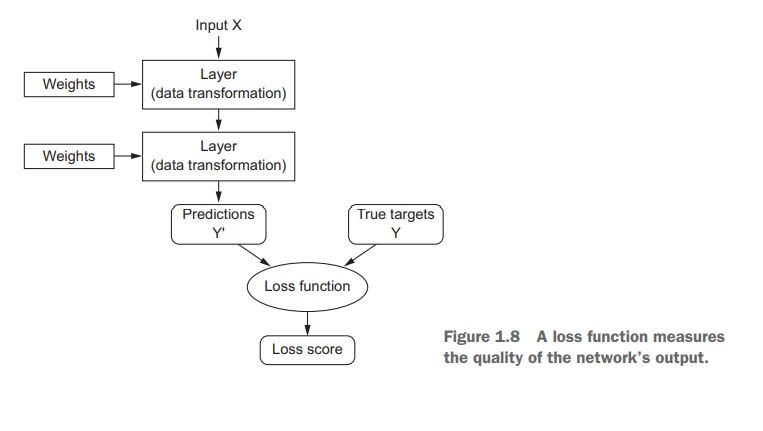

* A loss function — How the network will be able to measure its performance on
the training data, and thus how it will be able to steer itself in the right direction.

* An optimizer — The mechanism through which the network will update itself
based on the data it sees and its loss function.

Learning means finding a combination of model parameters that minimizes a loss function for a given set of training data samples and their corresponding targets.

Note : A neural network that has multiple outputs may have multiple loss functions (one per output). But the gradient-descent process must be based on a single scalar loss value; so, for multiloss networks, all losses are combined (via averaging) into a single scalar quantity.

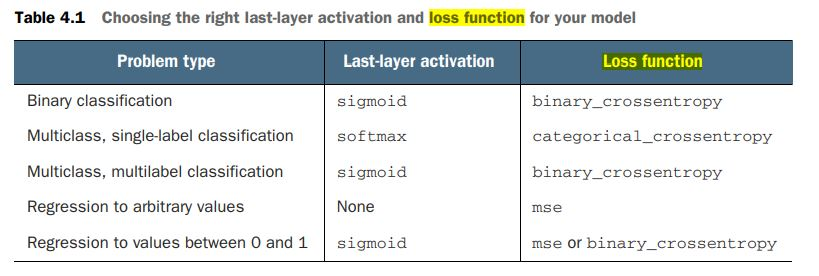

#**Multi-Class Classification Loss Functions**

Multi-Class classification are those predictive modeling problems where examples are assigned one of more than two classes.

The problem is often framed as predicting an integer value, where each class is assigned a unique integer value from 0 to (num_classes – 1). The problem is often implemented as predicting the probability of the example belonging to each known class.

In this section, we will investigate loss functions that are appropriate for multi-class classification predictive modeling problems.

**Cross-entropy** loss is often simply referred to as “cross-entropy,” “logarithmic loss,” “logistic loss,” or “log loss” for short.

**Each predicted probability is compared to the actual class output value (0 or 1) and a score is calculated that penalizes the probability based on the distance from the expected value.**

In the language of classification, these are the actual and the predicted probabilities, or y and yhat.

* Expected Probability (y): The known probability of each class label for an example in the dataset (P).
* Predicted Probability (yhat): The probability of each class label an example predicted by the model (Q).


We can, therefore, estimate the cross-entropy for a single prediction using the cross-entropy calculation described above; for example.

**H(P, Q) = – sum x in X P(x) * log(Q(x))**

##**1. Multi-Class Cross-Entropy Loss**

* Cross-entropy is the default loss function to use for multi-class classification problems.

* In this case, it is intended for use with multi-class classification where the target values are in the set {0, 1, 3, …, n}, where each class is assigned a unique integer value.

* Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.

* Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for all classes in the problem. The score is minimized and a perfect cross-entropy value is 0.

In [ ]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from numpy import where
from matplotlib import pyplot
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, optimizers, losses, metrics
import matplotlib.pyplot as plt
from matplotlib import pyplot

We will use the blobs problem as the basis for the investigation. The make_blobs() function provided by the scikit-learn provides a way to generate examples given a specified number of classes and input features. **We will use this function to generate 1,000 examples for a 3-class classification problem with 2 input variables.** The pseudorandom number generator will be seeded consistently so that the same 1,000 examples are generated each time the code is run.

In [ ]:
# generate dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

* The two input variables can be taken as x and y coordinates for points on a two-dimensional plane.

* The example below creates a scatter plot of the entire dataset coloring points by their class membership.

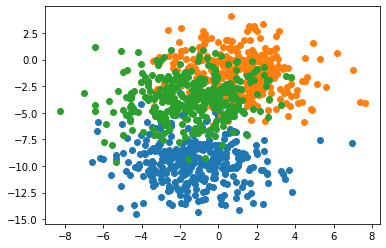

In [ ]:
# select indices of points with each class label
for i in range(3):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

* Running the example creates a scatter plot showing the 1,000 examples in the dataset with examples belonging to the 0, 1, and 2 classes colors blue, orange, and green respectively.

In [ ]:
# one hot encode output variable
y = to_categorical(y)

In [ ]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.838, Test: 0.822


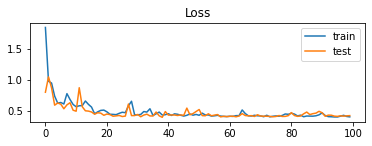

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

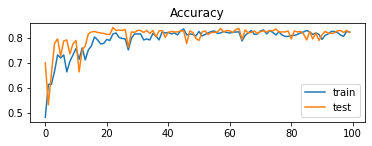

In [ ]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

* A figure is also created showing two line plots, the top with the cross-entropy loss over epochs for the train (blue) and test (orange) dataset, and the bottom plot showing classification accuracy over epochs.

* In this case, the plot shows the model seems to have converged. The line plots for both cross-entropy and accuracy both show good convergence behavior, although somewhat bumpy. 

##**2. Sparse Multiclass Cross-Entropy Loss**

* A possible cause of frustration when using cross-entropy with classification problems with a large number of labels is the one hot encoding process.

* For example, predicting words in a vocabulary may have tens or hundreds of thousands of categories, one for each label. This can mean that the target element of each training example may require a one hot encoded vector with tens or hundreds of thousands of zero values, requiring significant memory.

* Sparse cross-entropy addresses this by performing the same cross-entropy calculation of error, **without requiring that the target variable be one hot encoded prior to training.**

In [ ]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.832, Test: 0.814


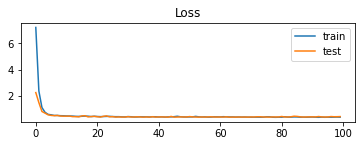

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

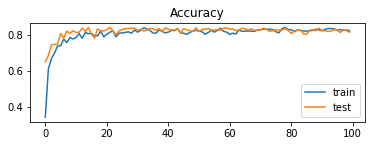

In [ ]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

* In this case, we can see the model achieves good performance on the problem. In fact, if you repeat the experiment many times, the average performance of sparse and non-sparse cross-entropy should be comparable.

* A figure is also created showing two line plots, the top with the sparse cross-entropy loss over epochs for the train (blue) and test (orange) dataset, and the bottom plot showing classification accuracy over epochs.

#**MNIST EXAMPLE**

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
#Load the Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
my_model = models.Sequential()
my_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
my_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
#Summarize the Model
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


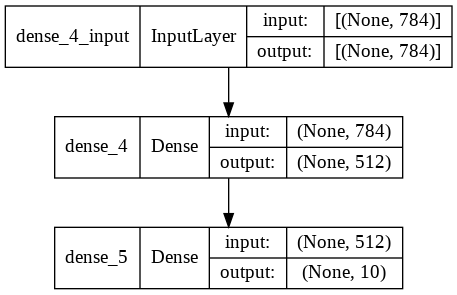

In [ ]:
#Plot the Model
from tensorflow.keras.utils import plot_model
plot_model(my_model, to_file='my_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
opt = SGD(learning_rate=0.1)
my_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#We also need to categorically encode the labels
from tensorflow.keras.utils import to_categorical
train_labels_one_hot_encoded = to_categorical(train_labels)
test_labels_one_hot_encoded = to_categorical(test_labels)

In [ ]:
train_labels_one_hot_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
history = my_model.fit(train_images, train_labels_one_hot_encoded, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4398 - accuracy: 0.8838
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2430 - accuracy: 0.9327
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1928 - accuracy: 0.9463
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1603 - accuracy: 0.9559
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1375 - accuracy: 0.9622


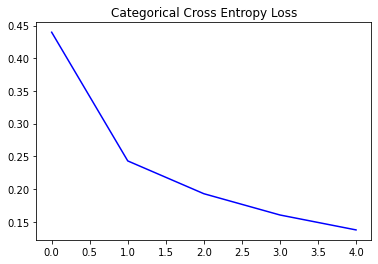

In [ ]:
# plot loss
plt.title('Categorical Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.show()

**NOTE : To sparse_categorical_crossentropy labels should not be one hot encoded.**

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
my_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = my_model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1202 - accuracy: 0.9670
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1069 - accuracy: 0.9707
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0963 - accuracy: 0.9735
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0875 - accuracy: 0.9763
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0797 - accuracy: 0.9784


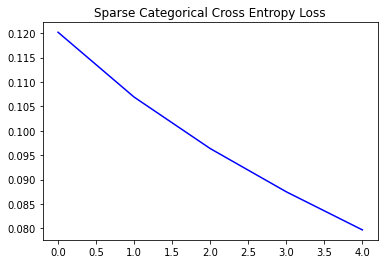

In [ ]:
# plot loss
plt.title('Sparse Categorical Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.show()